In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
users = pd.read_csv('../data/train_users_2.csv')
test_users = pd.read_csv('../data/test_users.csv')
sessions = pd.read_csv('../data/sessions.csv')
ages = pd.read_csv('../data/age_gender_bkts.csv')
countries = pd.read_csv('../data/countries.csv')
user_ids = set(sessions.user_id.values).intersection(users.id.values)

In [3]:
users_df = users[users['country_destination'] != 'NDF'].head(88000)
users_ndf = users[users['country_destination'] == 'NDF'].head(88000)
users = pd.concat([users_df, users_ndf])

In [4]:
users.reset_index(inplace=True)

In [5]:
list(user_ids)[:20]

['xe7ka1f90i',
 'ewcdz021x1',
 'fa02ey7dko',
 'mu3iwouo8h',
 'x27ixuk996',
 '816ryi7fb8',
 '0sk50mkq39',
 'tip6upmxc1',
 'ni72fl74cl',
 '9mr5qqwq8w',
 'o7f6p8rpuw',
 'ubtc46x95z',
 '0dudvax1ew',
 'cjbkj19ilo',
 '00bxmflswn',
 '2frfwrbr4m',
 '0291diw5cw',
 '21um0wbxas',
 'plbt59pbig',
 'q2lvd5s12g']

# From a given user, search and display all information about this person.

I want to extract :
* data from train
* sessions historic
* in what category of statistic this person belongs to

Next, thanks to the collected information, create a function to extract the most relevent information from NDF and DF.

In [6]:
def user_data(user_id):
    general = users[users['id'] == user_id]
    historic = sessions[sessions['user_id'] == user_id]
    return general, historic
    
general, historic = user_data('tf6hgwznal')
historic

,user_id,action,action_type,action_detail,device_type,secs_elapsed
4275411,tf6hgwznal,requested,view,p5,Windows Desktop,2813.0
4275412,tf6hgwznal,requested,submit,post_checkout_action,Windows Desktop,5434.0
4275413,tf6hgwznal,requested,view,p5,Windows Desktop,333.0
4275414,tf6hgwznal,create,submit,create_user,Windows Desktop,NaN
4275415,tf6hgwznal,requested,view,p5,Windows Desktop,2111.0
4275416,tf6hgwznal,header_userpic,data,header_userpic,Windows Desktop,3986.0
4275417,tf6hgwznal,NaN,message_post,message_post,Windows Desktop,308812.0
4275418,tf6hgwznal,pending,booking_request,pending,Windows Desktop,0.0
4275419,tf6hgwznal,requested,view,p5,Windows Desktop,1692.0


# Can we separate bookers and non bookers by looking at their sessions and data ?


In [7]:
users['booked'] = users.apply(lambda r: 'NDF' if r['country_destination'] == 'NDF' else 'DF', axis=1)

In [8]:
users['booked'].value_counts()

NDF    88000
DF     88000
Name: booked, dtype: int64

In [9]:
users['has_session'] = users.apply(lambda r: 1 if r['id'] in user_ids else 0, axis=1)

In [10]:
pd.crosstab(users['has_session'], users['booked'])

booked,DF,NDF
has_session,,
0,60133,78339
1,27867,9661


In [11]:
general, historic = user_data('4grx6yxeby')
historic

,user_id,action,action_type,action_detail,device_type,secs_elapsed
136,4grx6yxeby,verify,-unknown-,-unknown-,Windows Desktop,65080.0
137,4grx6yxeby,create,submit,create_user,Windows Desktop,NaN
138,4grx6yxeby,NaN,message_post,message_post,Windows Desktop,59801.0
139,4grx6yxeby,pending,booking_request,pending,Windows Desktop,1000.0
140,4grx6yxeby,requested,view,p5,Windows Desktop,1624.0
141,4grx6yxeby,header_userpic,data,header_userpic,Windows Desktop,5134.0
142,4grx6yxeby,concierge,-unknown-,-unknown-,Windows Desktop,169295.0
143,4grx6yxeby,active,-unknown-,-unknown-,-unknown-,75493.0
144,4grx6yxeby,multi,-unknown-,-unknown-,-unknown-,90.0
145,4grx6yxeby,faq_experiment_ids,-unknown-,-unknown-,-unknown-,53.0


In [12]:
def reformat_timestamp(r):
    s = str(r)
    y = s[:4]
    m = s[4:6]
    d = s[6:8]
    h = s[8:10]
    mi = s[10:12]
    sec = s[12:]
    return y + "-" + m + "-" + d #+ " " + h + "-" + mi + "-" + sec

users['timestamp'] = users.apply(lambda r: reformat_timestamp(r['timestamp_first_active']), axis=1)

#### Among general data, what are the most common value for NDF and DF ?

### Time, duration & dates

In [13]:
from datetime import datetime

def days_between(d1, d2, t1="%Y-%m-%d", t2="%Y-%m-%d"):
    d1 = datetime.strptime(d1, t1)
    d2 = datetime.strptime(d2, t2)
    return abs((d2 - d1).days)

In [14]:
users.head()

,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,booked,has_session,timestamp
0,2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,DF,0,2009-06-09
1,3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,DF,0,2009-10-31
2,4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,DF,0,2009-12-08
3,5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,DF,0,2010-01-01
4,6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,DF,0,2010-01-02


In [15]:
users[users['booked'] == 'DF'].apply(lambda r: days_between(r['date_account_created'], r['date_first_booking']), axis=1).median()
# Users book within 3 days

3.0

In [16]:
users['vagabond_time'] = users.apply(lambda r: days_between(r['date_account_created'], r['timestamp'], t2='%Y-%m-%d'), axis=1)

In [17]:
users[(users['booked'] == 'NDF') & (users['vagabond_time'] > 0)]['vagabond_time'].count()

54

In [18]:
# Period
users['month_account_created'] = users.apply(lambda r: int(r['date_account_created'].split('-')[1]), axis=1)

(array([[10476.,     0.,     0.,  7183.,     0.,     0.,     0.,  4223.,
             0.,     0.,  4815.,     0.,     0.,     0.,  5820.,     0.,
             0.,     0.,  6564.,     0.,     0.,  7802.,     0.,     0.,
             0.,  8229.,     0.,     0.,     0.,  9143.,     0.,     0.,
          7751.,     0.,     0.,     0.,  7841.,     0.,     0.,  8153.],
        [ 7019.,     0.,     0.,  7024.,     0.,     0.,     0.,  8670.,
             0.,     0.,  9266.,     0.,     0.,     0., 10955.,     0.,
             0.,     0., 10137.,     0.,     0.,  6030.,     0.,     0.,
             0.,  6382.,     0.,     0.,     0.,  6252.,     0.,     0.,
          5725.,     0.,     0.,     0.,  5288.,     0.,     0.,  5252.]]),
 array([ 1.   ,  1.275,  1.55 ,  1.825,  2.1  ,  2.375,  2.65 ,  2.925,
         3.2  ,  3.475,  3.75 ,  4.025,  4.3  ,  4.575,  4.85 ,  5.125,
         5.4  ,  5.675,  5.95 ,  6.225,  6.5  ,  6.775,  7.05 ,  7.325,
         7.6  ,  7.875,  8.15 ,  8.425,  8.7  ,  8

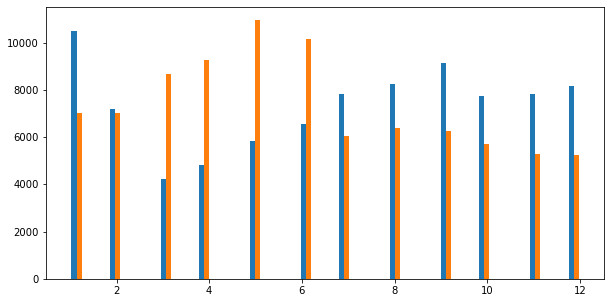

In [19]:
plt.figure(figsize=(10, 5))
# users[users['booked'] == 'NDF']['month_account_created'].hist(bins=40)
# users[users['booked'] == 'DF']['month_account_created'].hist(bins=40)

plt.hist([users[users['booked'] == 'NDF']['month_account_created'], users[users['booked'] == 'DF']['month_account_created']], bins=40, stacked=False)

### General

In [20]:
features = ['gender', 'signup_method', 'signup_flow', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']


In [21]:
users['null_age'] = users['age'].isnull()
users[users['null_age']]['booked'].value_counts() / (46078 + 20187)

NDF    0.69536
DF     0.30464
Name: booked, dtype: float64

In [22]:
print(users[(users['booked'] == 'NDF') & (users['has_session'] == 1)].age.quantile([0.25, 0.5, 0.75]))
print(users[(users['booked'] == 'DF') & (users['has_session'] == 1)].age.quantile([0.25, 0.5, 0.75]))

0.25    27.0
0.50    33.0
0.75    42.0
Name: age, dtype: float64
0.25    27.0
0.50    32.0
0.75    41.0
Name: age, dtype: float64


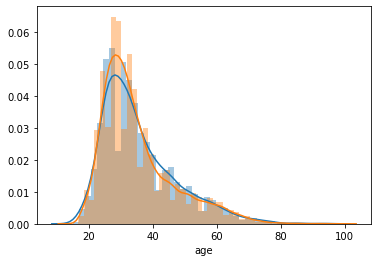

In [23]:
sns.distplot(users[(users['booked'] == 'NDF') & (users['age'] < 100) & (users['has_session'] == 1)]['age'])
sns.distplot(users[(users['booked'] == 'DF') & (users['age'] < 100) & (users['has_session'] == 1)]['age'])

In [24]:
users[(users['age'] > 100) & (users['age'] < 110)]['booked'].value_counts()

DF     882
NDF    310
Name: booked, dtype: int64

gender,-unknown-,FEMALE,MALE,OTHER
booked,,,,
DF,28685,31684,27456,175
NDF,44101,23629,20184,86


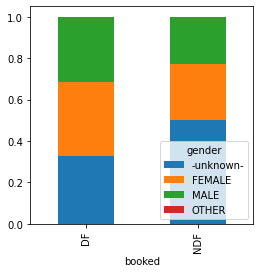

In [25]:
gender = pd.crosstab(users['booked'], users['gender'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
gender

signup_method,basic,facebook,google
booked,,,
DF,64362,23540,98
NDF,60672,27328,0


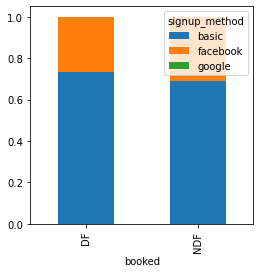

In [26]:
signup_method = pd.crosstab(users['booked'], users['signup_method'])
signup_method.div(signup_method.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
signup_method

signup_flow_buck,middle,out
booked,,
DF,5781,82219
NDF,3379,84621


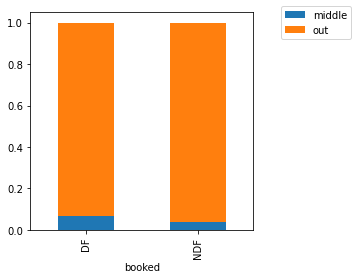

In [27]:
users['signup_flow_buck'] = users.apply(lambda r: 'middle' if r['signup_flow'] >= 3 and r['signup_flow'] <= 6 else 'out', axis=1)
signup_flow = pd.crosstab(users['booked'], users['signup_flow_buck'])
signup_flow.div(signup_flow.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.legend(bbox_to_anchor=(1.1, 1.05))
signup_flow

affiliate_channel,api,content,direct,other,remarketing,sem-brand,sem-non-brand,seo
booked,,,,,,,,
DF,2785,556,58794,3589,366,10882,7119,3909
NDF,4335,2506,54368,5054,343,8927,9136,3331


<Figure size 720x360 with 0 Axes>

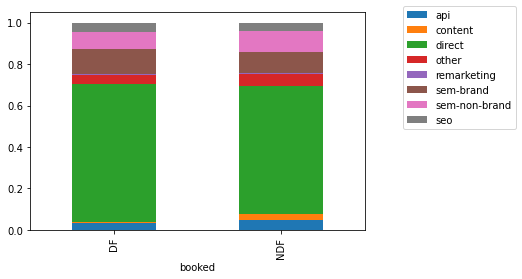

In [28]:
plt.figure(figsize=(10, 5))
v = pd.crosstab(users['booked'], users['affiliate_channel'])
v.div(v.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.1, 1.05))
v

affiliate_provider,baidu,bing,craigslist,daum,direct,email-marketing,facebook,facebook-open-graph,google,gsp,meetup,naver,other,padmapper,vast,wayn,yahoo,yandex
booked,,,,,,,,,,,,,,,,,,
DF,10,810,1616,1,58630,35,787,141,20514,37,46,18,4657,249,271,0,174,4
NDF,13,983,1853,0,54231,72,1273,369,20523,396,296,24,6669,453,558,8,274,5


<Figure size 720x360 with 0 Axes>

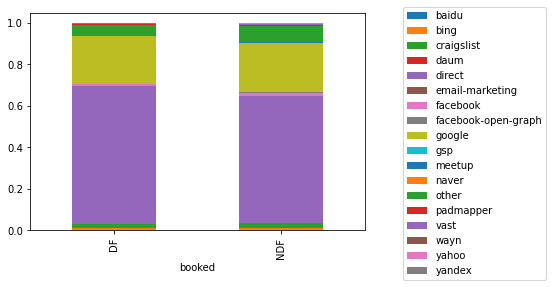

In [29]:
plt.figure(figsize=(10, 5))
v = pd.crosstab(users['booked'], users['affiliate_provider'])
v.div(v.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.1, 1.05))
v

first_affiliate_tracked,linked,local ops,marketing,omg,product,tracked-other,untracked
booked,,,,,,,
DF,19840,9,63,16213,536,2275,47326
NDF,19832,6,53,18587,628,3523,41417


<Figure size 720x360 with 0 Axes>

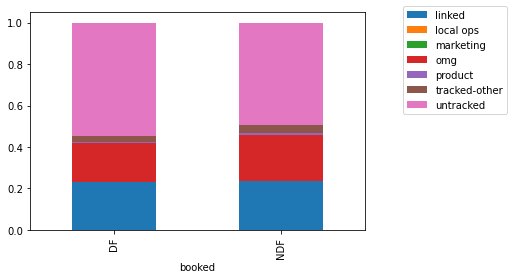

In [30]:
plt.figure(figsize=(10, 5))
v = pd.crosstab(users['booked'], users['first_affiliate_tracked'])
v.div(v.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.1, 1.05))
v

signup_app_buck,Web,other
booked,,
DF,79317,8683
NDF,77305,10695


<Figure size 720x360 with 0 Axes>

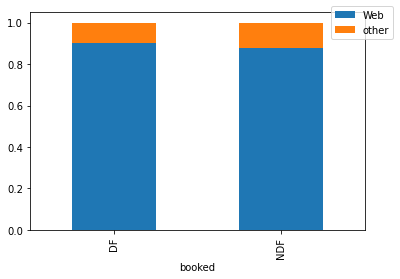

In [31]:
users['signup_app_buck'] = users.apply(lambda r: 'Web' if r['signup_app'] == 'Web' else 'other', axis=1)
plt.figure(figsize=(10, 5))
v = pd.crosstab(users['booked'], users['signup_app_buck'])
v.div(v.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.1, 1.05))
v

first_device_type,Android Phone,Android Tablet,Desktop (Other),Mac Desktop,Other/Unknown,SmartPhone (Other),Windows Desktop,iPad,iPhone
booked,,,,,,,,,
DF,682,454,542,41903,2869,24,29891,5407,6228
NDF,582,450,429,35621,6059,30,31975,6272,6582


<Figure size 720x360 with 0 Axes>

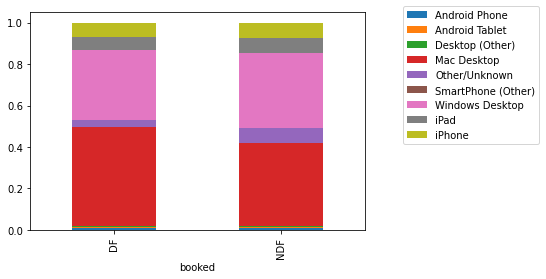

In [32]:
plt.figure(figsize=(10, 5))
v = pd.crosstab(users['booked'], users['first_device_type'])
v.div(v.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.1, 1.05))
v

first_browser_buck,-unknown-,Chrome,other
booked,,,
DF,7501,29597,50902
NDF,10932,24296,52772


<Figure size 720x360 with 0 Axes>

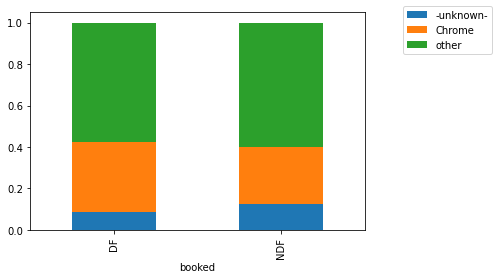

In [33]:
browsers = ['-unknown-','Chrome']
users['first_browser_buck'] = users.apply(lambda r: r['first_browser'] if r['first_browser'] in browsers else 'other', axis=1)
plt.figure(figsize=(10, 5))
v = pd.crosstab(users['booked'], users['first_browser_buck'])
v.div(v.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.1, 1.05))
v

## Info about sessions

### Actions

In [34]:
base_user_ids = sessions['user_id'].unique()
base_user_ids = base_user_ids.tolist()
base_user_ids.remove(np.nan)

In [35]:
some_ids = base_user_ids[:15000]

In [36]:
users_by_ids = users.set_index('id')
session_users = users_by_ids.loc[some_ids]

In [37]:
session_users['booked'].value_counts()

NDF    9112
DF     5888
Name: booked, dtype: int64

In [38]:
session_users_ndf = session_users[session_users['booked'] == 'NDF'].head(5000)
session_users_df = session_users[session_users['booked'] == 'DF'].head(5000)
session_users = pd.concat([session_users_ndf, session_users_df])
session_users

,index,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,country_destination,booked,has_session,timestamp,vagabond_time,month_account_created,null_age,signup_flow_buck,signup_app_buck,first_browser_buck
id,,,,,,,,,,,,,,,,,,,,,
yo8nz8bqcq,137022,2014-01-01,20140101001558,NaN,-unknown-,NaN,basic,0,en,direct,...,NDF,NDF,1,2014-01-01,0,1,True,out,Web,other
4grx6yxeby,137023,2014-01-01,20140101001639,NaN,-unknown-,NaN,basic,0,en,sem-brand,...,NDF,NDF,1,2014-01-01,0,1,True,out,Web,other
ncf87guaf0,137024,2014-01-01,20140101002146,NaN,-unknown-,NaN,basic,0,en,direct,...,NDF,NDF,1,2014-01-01,0,1,True,out,Web,Chrome
c8mfesvkv0,137026,2014-01-01,20140101002626,NaN,-unknown-,NaN,basic,0,en,direct,...,NDF,NDF,1,2014-01-01,0,1,True,out,Web,other
5f45ro5uzk,137028,2014-01-01,20140101003535,NaN,-unknown-,NaN,basic,0,en,direct,...,NDF,NDF,1,2014-01-01,0,1,True,out,Web,Chrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6wd9hfr87d,150745,2014-02-08,20140208205044,2014-11-16,FEMALE,22.0,facebook,0,en,direct,...,US,DF,1,2014-02-08,0,2,False,out,Web,Chrome
oio533g49l,150746,2014-02-08,20140208205226,2014-02-10,-unknown-,NaN,basic,0,en,seo,...,US,DF,1,2014-02-08,0,2,True,out,Web,Chrome
74d79t0iyi,150751,2014-02-08,20140208210846,2014-02-08,-unknown-,NaN,basic,0,en,seo,...,US,DF,1,2014-02-08,0,2,True,out,Web,Chrome


In [39]:
filtered_sessions = sessions[sessions['user_id'].isin(session_users.index)]
filtered_sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [40]:
# filtered_sessions['booked'] = filtered_sessions.apply(lambda r: session_users.loc[r['user_id'], 'booked'], axis=1)
filtered_sessions = pd.read_csv('../data/filtered_sessions.csv', sep=',')

In [41]:
filtered_sessions.head()

,Unnamed: 0,user_id,action,action_type,action_detail,device_type,secs_elapsed,booked
0,0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,DF
1,1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,DF
2,2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,DF
3,3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,DF
4,4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,DF


Median NDF : 650735.0
Median DF : 1180059.5


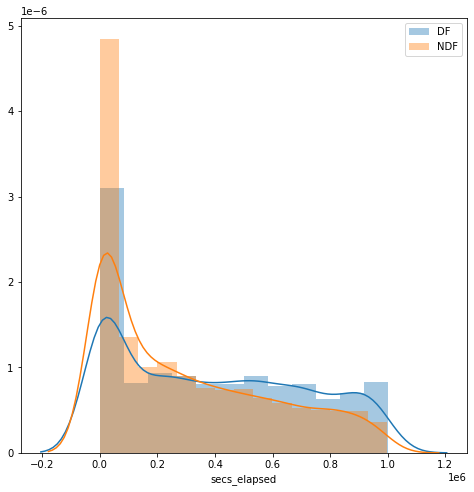

In [87]:
time_elapsed = filtered_sessions.groupby(['user_id', 'booked'])['secs_elapsed'].sum()
# sns.distplot(time_elapsed)
plt.figure(figsize=(8, 8))
sns.distplot(time_elapsed[time_elapsed < 0.1e7].loc[:,'DF'], label='DF')
sns.distplot(time_elapsed[time_elapsed < 0.1e7].loc[:,'NDF'], label='NDF')
plt.legend()
print(f'Median NDF : {time_elapsed.loc[:, "NDF"].median()}')
print(f'Median DF : {time_elapsed.loc[:, "DF"].median()}')

In [71]:
time_elapsed

user_id     booked
0035hobuyj  DF        5724670.0
00fhpdik5t  NDF        221087.0
00fn6wu77e  DF        2627237.0
00fyswof3k  DF        3625032.0
00g52q8uim  NDF        511514.0
                        ...    
zzh1oo3788  DF         859807.0
zzlo8vf821  DF         380056.0
zzoxgcuxxj  NDF          1800.0
zzqb2sn066  NDF        580836.0
zzysuoqg6x  NDF          1731.0
Name: secs_elapsed, Length: 10000, dtype: float64

In [43]:
filtered_sessions['user_id'].unique().tolist()[:10]

['d1mm9tcy42',
 'yo8nz8bqcq',
 '4grx6yxeby',
 'ncf87guaf0',
 '4rvqpxoh3h',
 'c8mfesvkv0',
 'xwxei6hdk4',
 '5f45ro5uzk',
 'ro2stddszp',
 'qtw88d9pbl']

In [44]:
filtered_sessions[filtered_sessions['user_id'] == 'qtw88d9pbl']

,Unnamed: 0,user_id,action,action_type,action_detail,device_type,secs_elapsed,booked
411,411,qtw88d9pbl,track_page_view,NaN,NaN,Mac Desktop,594.0,NDF
412,412,qtw88d9pbl,show,view,wishlist,Mac Desktop,8164.0,NDF
413,413,qtw88d9pbl,show_personalize,data,user_profile_content_update,Mac Desktop,621.0,NDF
414,414,qtw88d9pbl,show,view,user_profile,Mac Desktop,13790.0,NDF
415,415,qtw88d9pbl,show_personalize,data,user_profile_content_update,Mac Desktop,358.0,NDF
...,...,...,...,...,...,...,...,...
770,770,qtw88d9pbl,track_page_view,NaN,NaN,Mac Desktop,1200.0,NDF
771,771,qtw88d9pbl,track_page_view,NaN,NaN,Mac Desktop,345.0,NDF
772,772,qtw88d9pbl,track_page_view,NaN,NaN,Mac Desktop,7244.0,NDF
773,773,qtw88d9pbl,personalize,data,wishlist_content_update,Mac Desktop,37.0,NDF


In [45]:
filtered_sessions.groupby(['user_id', 'booked'])['action'].agg(pd.Series.mode).loc[:,'DF']

user_id
0035hobuyj                                       search_results
00fn6wu77e                                               lookup
00fyswof3k                                               update
00iapy7gb3                                  [personalize, show]
00s1ecz3b2                                            requested
                                    ...                        
zyk8k12cm5                                                 show
zyrjrqqs86    [confirm_email, create, dashboard, header_user...
zz26o1zmwb                                                  qt2
zzh1oo3788            [ajax_check_dates, ajax_refresh_subtotal]
zzlo8vf821                                ajax_refresh_subtotal
Name: action, Length: 5000, dtype: object

In [46]:
# Number of actions
filtered_sessions.groupby(['user_id', 'booked']).count()['action'].loc[:,'NDF'].median()

27.0

In [47]:
actions = filtered_sessions.action.value_counts()
actions[actions > 500].index.tolist()

['show',
 'personalize',
 'search_results',
 'lookup',
 'ajax_refresh_subtotal',
 'index',
 'similar_listings',
 'update',
 'search',
 'create',
 'header_userpic',
 'track_page_view',
 'social_connections',
 'active',
 'collections',
 'dashboard',
 'calendar_tab_inner2',
 'ajax_check_dates',
 'edit',
 'confirm_email',
 'ask_question',
 'requested',
 'authenticate',
 'hosting_social_proof',
 'other_hosting_reviews_first',
 'show_personalize',
 'ajax_lwlb_contact',
 'qt2',
 'reviews',
 'listings',
 'unavailabilities',
 'verify',
 'identity',
 'travel_plans_current',
 'pending',
 'notifications',
 'campaigns',
 'profile_pic',
 'edit_verification',
 'ajax_photo_widget_form_iframe',
 'manage_listing',
 'kba_update',
 'my',
 'ajax_image_upload',
 'cancellation_policies',
 'complete_status',
 'apply_reservation',
 'faq',
 'open_graph_setting',
 'faq_experiment_ids',
 'qt_reply_v2',
 'kba',
 'account',
 'available',
 'connect',
 'faq_category',
 'request_new_confirm_email',
 'callback',
 'popu

In [48]:
# Actions that are common among DF / NDF
actions = filtered_sessions.groupby(['user_id', 'booked']).agg({'action': pd.Series.tolist}).reset_index()
actions['number_actions'] = actions.apply(lambda r: r['action'].__len__(), axis=1)
actions.head()

,user_id,booked,action,number_actions
0,0035hobuyj,DF,"[lookup, search_results, lookup, search_result...",489
1,00fhpdik5t,NDF,"[tell_a_friend, index, hosting_social_proof, i...",27
2,00fn6wu77e,DF,"[lookup, verify, search_results, lookup, show,...",36
3,00fyswof3k,DF,"[manage_listing, index, references, update, up...",57
4,00g52q8uim,NDF,"[personalize, lookup, index, lookup, personali...",82


In [49]:
# Actions that are the most common among DF
def count_actions(action, booked):
    actions['tmp'] = actions.apply(lambda r: 1 if action in r['action'] else 0, axis=1)
    return actions[actions['booked'] == booked]['tmp'].sum()

count_actions('show', 'DF')

3850

In [50]:
action_stats_df = pd.DataFrame()
action_stats_df['action'] = filtered_sessions.action.unique()
action_stats_df['count'] = action_stats_df.apply(lambda r: count_actions(r['action'], 'DF'), axis=1)
action_stats_df

,action,count
0,lookup,2377
1,search_results,2208
2,personalize,3380
3,index,3333
4,similar_listings,2558
...,...,...
230,locale_from_host,1
231,terms_and_conditions,3
232,invalid_action,1
233,photography_update,1


In [51]:
action_stats_ndf = pd.DataFrame()
action_stats_ndf['action'] = filtered_sessions.action.unique()
action_stats_ndf['count'] = action_stats_ndf.apply(lambda r: count_actions(r['action'], 'NDF'), axis=1)
action_stats_ndf

,action,count
0,lookup,2174
1,search_results,2068
2,personalize,3001
3,index,3077
4,similar_listings,2243
...,...,...
230,locale_from_host,0
231,terms_and_conditions,0
232,invalid_action,0
233,photography_update,0


In [52]:
pd.set_option('display.max_rows', 300)

In [53]:
action_stats = pd.DataFrame()
action_stats['action'] = filtered_sessions['action'].unique()
action_stats['count_df'] = action_stats_df['count'].values
action_stats['count_ndf'] = action_stats_ndf['count'].values
action_stats['diff'] = (action_stats['count_df'] - action_stats['count_ndf']) / (action_stats['count_df'] + action_stats['count_ndf'])

In [54]:
action_stats[action_stats['count_df'] + action_stats['count_ndf'] > 500].sort_values(by='diff').head()

,action,count_df,count_ndf,diff
85,manage_listing,145,392,-0.459963
86,set_user,145,391,-0.458955
31,campaigns,276,522,-0.308271
52,social_connections,217,405,-0.302251
55,collections,249,421,-0.256716


In [55]:
action_stats[action_stats['count_df'] + action_stats['count_ndf'] > 500].sort_values(by='diff').tail(10)

,action,count_df,count_ndf,diff
124,ajax_image_upload,557,200,0.471598
41,identity,689,242,0.480129
47,kba,435,147,0.494845
27,cancellation_policies,653,198,0.534665
66,connect,391,115,0.545455
21,verify,1790,482,0.575704
43,travel_plans_current,1123,291,0.588402
44,complete_status,475,112,0.618399
22,pending,1170,156,0.764706
23,requested,1042,106,0.815331


### Action type

In [56]:
filtered_sessions['action_type'].unique()

array([nan, 'click', 'data', 'view', 'submit', 'message_post',
       '-unknown-', 'booking_request', 'partner_callback',
       'booking_response'], dtype=object)

In [57]:
filtered_sessions[filtered_sessions['action_type'] == 'booking_request']['booked'].value_counts()

DF     1534
NDF     164
Name: booked, dtype: int64

In [58]:
ndf = filtered_sessions[(filtered_sessions['action_type'] == 'booking_request') & (filtered_sessions['booked'] == 'NDF') & (filtered_sessions['action'] == 'pending')]['user_id']
ndf.values[:10]

array(['4grx6yxeby', 'j0mufvhhoh', 'gfk3se1jpj', 'dgokgbd81z',
       '301z3kw1e6', 'xfzo7oy61k', 'xfzo7oy61k', 'nxku33rpc2',
       '55iwc2jbzr', 'iylycz0033'], dtype=object)

In [59]:
a, g = user_data('nxku33rpc2')
a

,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,country_destination,booked,has_session,timestamp,vagabond_time,month_account_created,null_age,signup_flow_buck,signup_app_buck,first_browser_buck
165738,137661,nxku33rpc2,2014-01-03,20140103061003,NaN,-unknown-,39.0,basic,12,en,...,NDF,NDF,1,2014-01-03,0,1,False,out,other,-unknown-


In [60]:
action_types = filtered_sessions.groupby(['action', 'action_type']).count().reset_index()[['action', 'action_type']]
action_types.head()

,action,action_type
0,10,message_post
1,11,message_post
2,12,message_post
3,15,message_post
4,about_us,-unknown-


In [61]:
details = filtered_sessions.groupby(['user_id', 'booked']).agg({'action_detail': pd.Series.tolist}).reset_index()
details.head()

,user_id,booked,action_detail
0,0035hobuyj,DF,"[nan, view_search_results, nan, view_search_re..."
1,00fhpdik5t,NDF,"[-unknown-, -unknown-, -unknown-, message_thre..."
2,00fn6wu77e,DF,"[nan, -unknown-, view_search_results, nan, nan..."
3,00fyswof3k,DF,"[manage_listing, your_listings, profile_refere..."
4,00g52q8uim,NDF,"[wishlist_content_update, nan, view_search_res..."


In [62]:
def count_details(action_detail, booked):
    details['tmp'] = details.apply(lambda r: 1 if action_detail in r['action_detail'] else 0, axis=1)
    return details[details['booked'] == booked]['tmp'].sum()

count_details('-unknown-', 'DF')

4012

In [63]:
detail_stats_df = pd.DataFrame()
detail_stats_df['detail'] = filtered_sessions['action_detail'].unique()
detail_stats_df['count'] = detail_stats_df.apply(lambda r: count_details(r['detail'], 'DF'), axis=1)
detail_stats_df.head()

,detail,count
0,NaN,3473
1,view_search_results,2732
2,wishlist_content_update,3380
3,similar_listings,2558
4,change_trip_characteristics,2849


In [64]:
detail_stats_ndf = pd.DataFrame()
detail_stats_ndf['detail'] = filtered_sessions['action_detail'].unique()
detail_stats_ndf['count'] = detail_stats_ndf.apply(lambda r: count_details(r['detail'], 'NDF'), axis=1)
detail_stats_ndf.head()

,detail,count
0,NaN,3266
1,view_search_results,2730
2,wishlist_content_update,3001
3,similar_listings,2243
4,change_trip_characteristics,2211


In [65]:
detail_stats = pd.DataFrame()
detail_stats['detail'] = filtered_sessions['action_detail'].unique()
detail_stats['count_df'] = detail_stats_df['count'].values
detail_stats['count_ndf'] = detail_stats_ndf['count'].values
detail_stats['diff'] = (detail_stats['count_df'] - detail_stats['count_ndf']) / (detail_stats['count_df'] + detail_stats['count_ndf'])
detail_stats = detail_stats[~detail_stats['detail'].isnull()]

In [66]:
detail_lists = filtered_sessions.groupby('action_detail').agg({'action': pd.Series.tolist})
detail_lists.head()

,action
action_detail,
-unknown-,"[other_hosting_reviews_first, hosting_social_p..."
account_notification_settings,"[notifications, notifications, notifications, ..."
account_payout_preferences,"[payout_preferences, payout_preferences, payou..."
account_privacy_settings,"[privacy, privacy, privacy, privacy, privacy, ..."
account_transaction_history,"[transaction_history, transaction_history, tra..."


In [67]:
detail_stats['actions'] = detail_stats.apply(lambda r: detail_lists.loc[str(r['detail'])], axis=1)
detail_stats['actions'] = detail_stats.apply(lambda r: set(r['actions']), axis=1)

detail_stats[detail_stats['count_df'] + detail_stats['count_ndf'] > 100].sort_values(by='diff')

,detail,count_df,count_ndf,diff,actions
41,manage_listing,145,392,-0.459963,{manage_listing}
42,create_listing,149,398,-0.455210,"{create, set_user}"
75,update_listing_description,81,201,-0.425532,{update}
84,signup,155,322,-0.350105,{create}
77,update_user,101,175,-0.268116,{update}
78,notifications,236,396,-0.253165,{notifications}
79,user_social_connections,187,310,-0.247485,{social_connections}
80,unavailable_dates,154,204,-0.139665,{unavailabilities}
82,listing_reviews,143,185,-0.128049,{reviews}
81,reservations,128,163,-0.120275,{index}
